<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Vera Lucia (PSTU) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pela candidata Vera Lucia do partido PSTU, do qual pode ser visualizado clicando <a href="https://divulgacandcontas.tse.jus.br/candidaturas/oficial/2022/BR/BR/544/candidatos/898012/5_1659739349964.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = '../PlanosPDF/PLANOPSTU.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'Author': 'PSTU',
 'CreationDate': "D:20220805190338-03'00'",
 'ModDate': "D:20220805190338-03'00'",
 'Producer': 'Microsoft: Print To PDF',
 'Title': 'Microsoft Word - Programa_PSTU 16'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

26

In [7]:
# Página 1
pdf.pages[0].extract_text()

' \n \n \n \n \n \nELEIÇÕES PRESIDENCIAIS – 2022 \n \nUM PROGRAMA SOCIALISTA PARA O BRASIL! \n \n1 \n \n \n1. EM QUE SITUAÇÃO ESTAMOS?  \nEstamos vivendo uma situação terrível no país e no mundo. A fome e o desemprego \ncrescem nos bairros populares. Quarenta e cinco milhões de pessoas passam fome nesse \nmomento, vinte por cento da população brasileira. Mais da metade (55%) do povo \nbrasileiro sofre de insegurança alimentar, ou seja, não tem segurança se vai poder \ncomer no futuro próximo (dados da Rede Brasileira de Pesquisa em Soberania e \nSegurança Alimentar e Nutricional).  \n \nExistem milhões de trabalhadores sem emprego ou com empregos informais, sem saber \ncomo garantir comida para sua família. A precarização do trabalho é uma expropriação \ndos direitos básicos dos trabalhadores como trabalho regular, férias, décimo terceiro, \naposentadoria. A uberização é uma espécie de escravidão moderna, trazendo a miséria \ne a insegurança mesmo para os empregados. Não existe mais ne

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

 
Em um único dia Jeff Bezos, dono da Amazon, ganhou 12,6 bilhões de dólares, o que 
seria suficiente para pagar um salário-mínimo a 60 milhões de brasileiros.  
No Brasil, o número de bilionários também aumentou nesses dois anos. Hoje existem 
315 bilionários no país, 42 surgidos durante a pandemia. No total, acumulam um 
patrimônio de 1,9 trilhões de reais. Entre eles estão os donos dos bancos Safra, Pactual, 
Garantia; de grandes indústrias, como a Ambev; empresas do agronegócio como a 
família Ometo (COSAN); de comercio como Luiza Trajano (Magazine Luiza). Com o 
dinheiro desses bilionários hoje se poderia dar um salário-mínimo mensal aos 92,1 
milhões de desempregados e subempregados por um ano e meio.  
 
Essa é a síntese da barbárie em que vivemos: 315 bilionários de um lado e do outro 92,1  5 
milhões de desempregados e subempregados. A grande burguesia, os bilionários, são 
uma  ínfima  minoria,  que  caberia  num  salão  de  festas.  Mas  mandam  no  país  e 
determinam a mis

## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

 
 
 
 
 
 
eleições presidenciais – 2022 
 
um programa socialista para o brasil! 
 
1 
 
 
1. em que situação estamos?  
estamos vivendo uma situação terrível no país e no mundo. a fome e o desemprego 
crescem nos bairros populares. quarenta e cinco milhões de pessoas passam fome nesse 
momento, vinte por cento da população brasileira. mais da metade (55%) do povo 
brasileiro sofre de insegurança alimentar, ou seja, não tem segurança se vai poder 
comer no futuro próximo (dados da rede brasileira de pesquisa em soberania e 
segurança alimentar e nutricional).  
 
existem milhões de trabalhadores sem emprego ou com empregos informais, sem saber 
como garantir comida para sua família. a precarização do trabalho é uma expropriação 
dos direitos básicos dos trabalhadores como trabalho regular, férias, décimo terceiro, 
aposentadoria. a uberização é uma espécie de escravidão moderna, trazendo a miséria 
e a insegurança mesmo para os empregados. não existe mais nenhuma segurança dos 
traba

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

 
 
 
 
 
 
eleições presidenciais   2022 
 
um programa socialista para o brasil  
 
1 
 
 
1  em que situação estamos   
estamos vivendo uma situação terrível no país e no mundo  a fome e o desemprego 
crescem nos bairros populares  quarenta e cinco milhões de pessoas passam fome nesse 
momento  vinte por cento da população brasileira  mais da metade  55  do povo 
brasileiro sofre de insegurança alimentar  ou seja  não tem segurança se vai poder 
comer no futuro próximo  dados da rede brasileira de pesquisa em soberania e 
segurança alimentar e nutricional   
 
existem milhões de trabalhadores sem emprego ou com empregos informais  sem saber 
como garantir comida para sua família  a precarização do trabalho é uma expropriação 
dos direitos básicos dos trabalhadores como trabalho regular  férias  décimo terceiro  
aposentadoria  a uberização é uma espécie de escravidão moderna  trazendo a miséria 
e a insegurança mesmo para os empregados  não existe mais nenhuma segurança dos 
trabalh

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['eleições', 'presidenciais', '2022', 'um', 'programa']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['eleições', 'presidenciais', '2022', 'programa', 'socialista']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('trabalhadores', 111),
 ('país', 67),
 ('burguesia', 58),
 ('empresas', 53),
 ('grandes', 53),
 ('contra', 48),
 ('todos', 43),
 ('defendemos', 39),
 ('meio', 33),
 ('classe', 31),
 ('bolsonaro', 28),
 ('povo', 27),
 ('capitalismo', 27),
 ('ambiente', 27),
 ('setores', 25),
 ('opressão', 25),
 ('governo', 24),
 ('população', 23),
 ('trabalho', 23),
 ('brasil', 21),
 ('violência', 21),
 ('revolução', 20),
 ('estado', 20),
 ('socialista', 19),
 ('barbárie', 19),
 ('capitalista', 19),
 ('hoje', 19),
 ('juventude', 19),
 ('produção', 19),
 ('opressões', 19)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,trabalhadores,111
1,país,67
2,burguesia,58
3,empresas,53
4,grandes,53


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

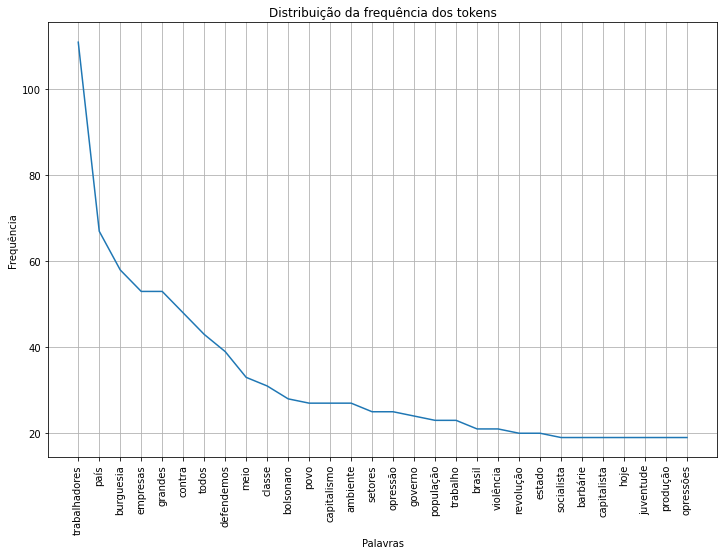

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

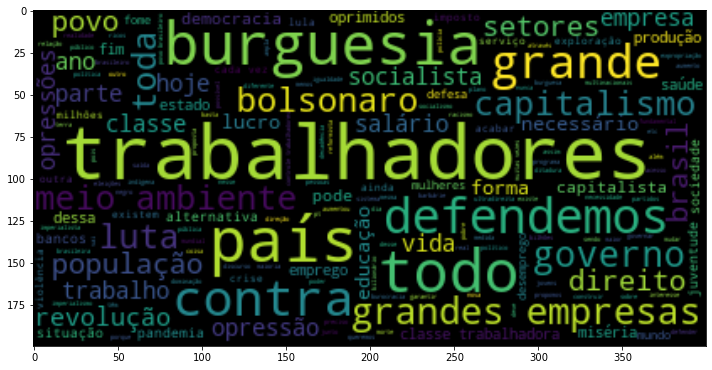

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022